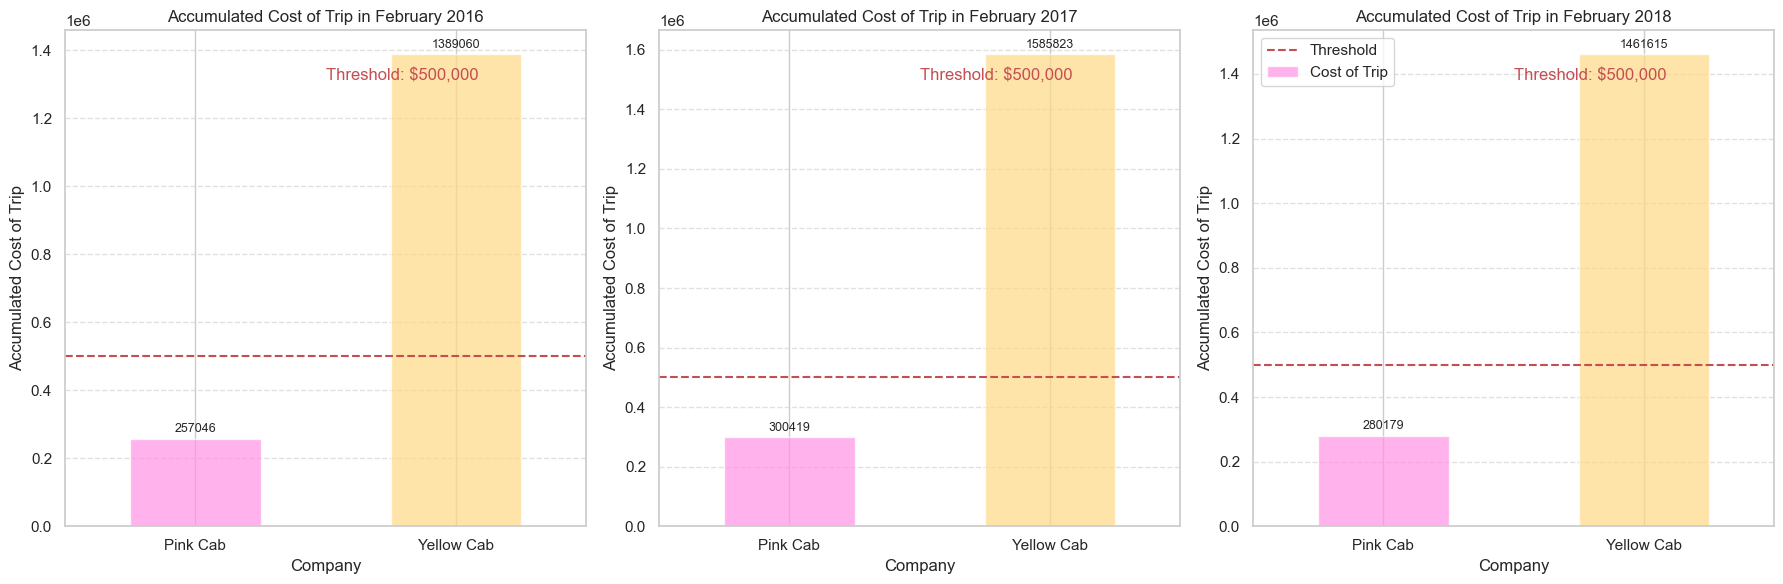

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from a CSV file
df = pd.read_csv('Cab_Data.csv')

# Check for and remove any duplicate records based on 'Transaction ID'
df.drop_duplicates(subset='Transaction ID', inplace=True)

# Convert the 'Date of Travel' column to a proper date format
df['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['Date of Travel'], unit='D')

# Extract the year and month from the 'Date of Travel'
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month

# Create individual line plots for February in 2016, 2017, and 2018
years = [2016, 2017, 2018]

# Set the style for our plots
sns.set(style="whitegrid")

# Create subplots for each year in a row
fig, axes = plt.subplots(1, len(years), figsize=(18, 6))  # Adjust the size as needed

for i, year in enumerate(years):
    # Filter data for February of the current year
    filtered_df = df[(df['Year'] == year) & (df['Month'] == 2)]

    # Group the filtered data by company and sum the cost of trips
    company_cost = filtered_df.groupby("Company")["Cost of Trip"].sum()

    # Define colors for our plots
    colors = ['#ff92e4', '#fed983']

    # Create a bar plot for each year's data
    company_cost.plot(kind="bar", color=colors, alpha=0.7, ax=axes[i])

    # Customize the plot with a title, labels, and more
    axes[i].set_title(f"Cost of Trips in February {year}")
    axes[i].set_xlabel("Company")
    axes[i].set_ylabel("Accumulated Cost of Trips")
    axes[i].tick_params(axis='x', rotation=0)
    
    # Add grid lines for better visibility
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    
    # Display data labels above each bar
    for x, y in enumerate(company_cost):
        axes[i].text(x, y + 10000, f'{y:.0f}', ha='center', va='bottom', fontsize=9)
    
    # Add a threshold line
    threshold_value = 500000  # Customize this threshold as needed
    axes[i].axhline(y=threshold_value, color='r', linestyle='--', label='Threshold')
    
    # Add a text annotation for the threshold
    axes[i].text(0.5, 0.9, f'Threshold: ${threshold_value:,.0f}', transform=axes[i].transAxes, color='r')

# Adjust the layout to fit all graphs in one row
plt.tight_layout()
plt.legend()  # Add a legend
plt.show()

# Data Quality Checks
# Check for missing values
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset.")

# You can also perform additional data quality checks or assumptions here.
